In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11,4)})
import os
%matplotlib inline

In [102]:
d="2020-10-01"
d1=d[5:10] 

In [103]:
df=pd.read_csv("T1.csv")

In [104]:
df["Date"]=df["Date/Time"].apply(lambda x:x[0:2]+"-"+x[3:5])

In [105]:
df

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Date
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,01-01
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,01-01
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,01-01
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,01-01
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,01-01
...,...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724,31-12
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599,31-12
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500,31-12
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913,31-12


In [106]:
m=[]
for x in range(144):
    m.append(d)
df1=pd.DataFrame(data=m,columns=["Date/Time"])
df1["Date"]=df1["Date/Time"].apply(lambda x:x[5:10])
df=df.set_index("Date")
df1=df1.set_index("Date")

In [107]:
df.loc[d1]

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
Date,,,,,
10-01,10 01 2018 00:00,472.515991,5.593637,496.343959,131.157898
10-01,10 01 2018 00:10,492.112488,5.953317,609.354587,127.265198
10-01,10 01 2018 00:20,270.477386,4.747573,276.322243,122.818398
10-01,10 01 2018 00:30,355.225006,5.255427,401.317671,122.046898
10-01,10 01 2018 00:40,288.439789,4.871134,304.961100,119.643799
...,...,...,...,...,...
10-01,10 01 2018 23:10,655.513489,6.200417,693.713198,233.005798
10-01,10 01 2018 23:20,1025.270996,7.247820,1131.567291,232.764893
10-01,10 01 2018 23:30,1425.744995,7.917921,1483.349584,231.453903


In [108]:
df1=pd.concat([df1,df.loc[d1][["Wind Speed (m/s)","Wind Direction (°)"]]],1)

In [109]:
df1

,Date/Time,Wind Speed (m/s),Wind Direction (°)
Date,,,
10-01,2020-10-01,5.593637,131.157898
10-01,2020-10-01,5.953317,127.265198
10-01,2020-10-01,4.747573,122.818398
10-01,2020-10-01,5.255427,122.046898
10-01,2020-10-01,4.871134,119.643799
...,...,...,...
10-01,2020-10-01,6.200417,233.005798
10-01,2020-10-01,7.247820,232.764893
10-01,2020-10-01,7.917921,231.453903


In [110]:
x=0
y=0
def date_time(t):
        global x
        global y
        t=t + "  "+ str(y)+":"+str(x*10)+":"+"00"
        if x<5:
            x=x+1
        else:
            x=0
            y=y+1
        return t   
df1["Date/Time"]=df1["Date/Time"].apply(date_time,1)
df1["Time"]=df1["Date/Time"].apply(lambda x:x[-8:-3],1)
df1.head()

,Date/Time,Wind Speed (m/s),Wind Direction (°),Time
Date,,,,
10-01,2020-10-01 0:0:00,5.593637,131.157898,0:0
10-01,2020-10-01 0:10:00,5.953317,127.265198,0:10
10-01,2020-10-01 0:20:00,4.747573,122.818398,0:20
10-01,2020-10-01 0:30:00,5.255427,122.046898,0:30
10-01,2020-10-01 0:40:00,4.871134,119.643799,0:40


In [111]:
df1["Hour"]=pd.to_timedelta(df1["Date/Time"].apply(lambda x:x[-8:],1)).dt.components["hours"]
df1[['date','time']] = df1['Date/Time'].str.split(expand=True)
df1['Date/Time'] = (pd.to_datetime(df1.pop('date'), format='%Y/%m/%d') + 
                  pd.to_timedelta(df1.pop('time') ))

In [67]:
df1["Hour"]=pd.to_timedelta(df1["Date/Time"].apply(lambda x:x[-8:],1)).dt.components["hours"]

numpy.int64

In [112]:
df1=df1.set_index("Date/Time")
df1["Month"]=df1.index.month

In [113]:
X1=df1[["Wind Speed (m/s)","Wind Direction (°)"]]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X1)
scaled_data=scaler.transform(X1)

In [114]:
import joblib
tpc=joblib.load('Wind Turbine(TPC).sav').predict(scaled_data)
tpc.shape

(144,)

In [15]:
df1["Theoretical_Power_Curve (KWh)"]=tpc

In [16]:

df1.head()

,Wind Speed (m/s),Wind Direction (°),Time,Hour,Month,Theoretical_Power_Curve (KWh)
Date/Time,,,,,,
2020-10-01 00:00:00,5.593637,131.157898,0:0,0,10,3457.655727
2020-10-01 00:10:00,5.953317,127.265198,0:10,0,10,3564.933842
2020-10-01 00:20:00,4.747573,122.818398,0:20,0,10,2821.116820
2020-10-01 00:30:00,5.255427,122.046898,0:30,0,10,3276.996017
2020-10-01 00:40:00,4.871134,119.643799,0:40,0,10,2955.323325


In [17]:

X2=df1[["Wind Speed (m/s)","Wind Direction (°)","Month","Hour"]]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X2)
scaled_data=scaler.transform(X2)

X2=df1[["Wind Speed","Wind direction","Month"]]

In [18]:
import joblib
lv=joblib.load('Wind Turbine(LV).sav').predict(scaled_data)
lv.shape

(144,)

In [19]:
df1["LV ActivePower (kW)"]=lv
df1

,Wind Speed (m/s),Wind Direction (°),Time,Hour,Month,Theoretical_Power_Curve (KWh),LV ActivePower (kW)
Date/Time,,,,,,,
2020-10-01 00:00:00,5.593637,131.157898,0:0,0,10,3457.655727,3080.279405
2020-10-01 00:10:00,5.953317,127.265198,0:10,0,10,3564.933842,3396.740247
2020-10-01 00:20:00,4.747573,122.818398,0:20,0,10,2821.116820,2341.079694
2020-10-01 00:30:00,5.255427,122.046898,0:30,0,10,3276.996017,2780.872881
2020-10-01 00:40:00,4.871134,119.643799,0:40,0,10,2955.323325,2450.874563
...,...,...,...,...,...,...,...
2020-10-01 23:10:00,6.200417,233.005798,23:10,23,10,3595.012206,3386.361858
2020-10-01 23:20:00,7.247820,232.764893,23:20,23,10,3600.000000,3576.305522
2020-10-01 23:30:00,7.917921,231.453903,23:30,23,10,3600.000000,3498.271106


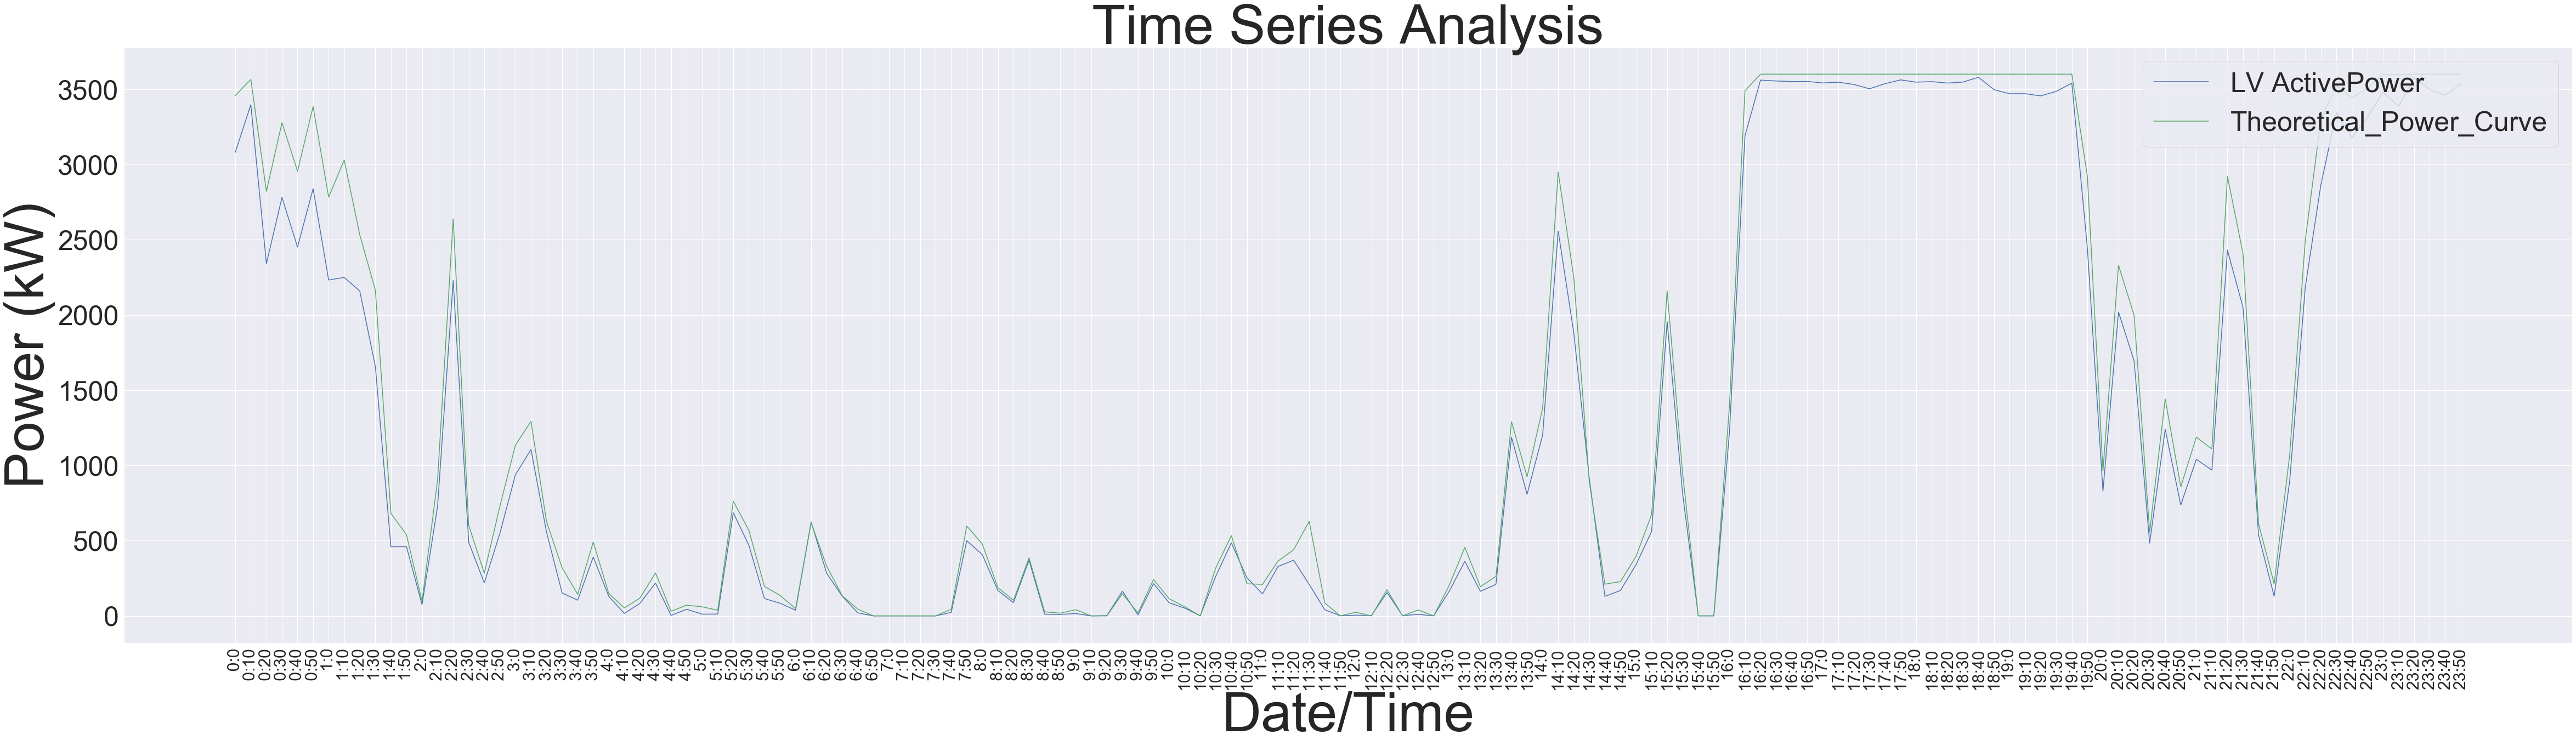

In [20]:
fig, axes = plt.subplots(figsize=(80,20))
x=df1["Time"]
y=df1["LV ActivePower (kW)"].values
z=df1["Theoretical_Power_Curve (KWh)"].values
axes.plot(x, y, 'b',label="LV ActivePower")
axes.plot(x,z,"g",label="Theoretical_Power_Curve")
axes.legend(fontsize=50,loc='upper right')
plt.xlabel('Date/Time',fontsize=100)
plt.ylabel('Power (kW)',fontsize=100)
plt.xticks(fontsize=30)
plt.yticks(fontsize=50)
axes.set_xticklabels(x,rotation=90)
axes.set_title('Time Series Analysis')
axes.title.set_size(100)
plt.savefig("Time Series Analysis.png")